In [1]:
import sys
import pymol
from pymol import cmd, stored
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
pymol.pymol_argv = ['pymol', '-qc'] # quiet / no GUI
stdout = sys.stdout
stderr = sys.stderr
pymol.finish_launching(['pymol', '-xiq'])
sys.stdout = stdout
sys.stderr = stderr

In [4]:
import numpy as np
import os
from matplotlib import pyplot as plt
%run 'functions_dump.py'

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
files_dump_folder = '/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/'
aa3 = "ALA CYS ASP GLU PHE GLY HIS ILE LYS LEU MET ASN PRO GLN ARG SER THR VAL TRP TYR XXX".split()
ascii_letters_upper = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

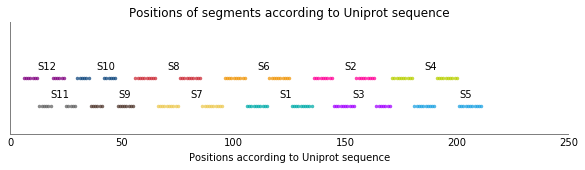

1886 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


In [6]:
%run 'ks01_Data_import.ipynb'

### PyMoling

In [7]:
def itasser_view():
    cmd.set_view([\
        -0.973489642,   -0.181398124,    0.139324859,\
         0.100018367,    0.210196137,    0.972527623,\
        -0.205700472,    0.960678399,   -0.186481640,\
         0.000000000,    0.000000000, -173.329299927,\
        56.072074890,   56.086124420,   56.071060181,\
       142.140213013,  204.518432617,  -20.000000000])
    
def lucas_view():
    cmd.set_view ([\
        -0.510012984,   -0.413525760,   -0.754239142,\
        -0.859676301,    0.215441972,    0.463183284,\
        -0.029043088,    0.884629667,   -0.465375006,\
         0.000000000,    0.000000000, -173.329299927,\
        56.072074890,   56.086124420,   56.071060181,\
       142.140213013,  204.518432617,  -20.000000000 ])

In [8]:
from IPython.display import Image

In [11]:
count_wt_state = True
natlib_mutations = [item for sublist in natural_unique_single_mutations.values() for item in sublist]
natlib_by_positions = defaultdict(list)
for mutation in natlib_mutations:
    position = int(mutation[:-1])
    natlib_by_positions[position].append(mutation)
for position in natlib_by_positions:
    natlib_by_positions[position] = set(natlib_by_positions[position])

assayed_positions = natlib_by_positions.keys()
possible_states = [len(natlib_by_positions[position]) + int(count_wt_state) for position in natlib_by_positions]
print set(possible_states)

set([2, 3, 4, 5, 6, 9])


In [58]:
def get_color(value):
    colors_dict = {9:(75,56,50), 6:(141,85,36), 5:(198,134,66), 4:(224,172,105), 3:(241,194,125), 2:(255,219,172)}
    return [v/255. for v in colors_dict[value]]

def color_positions(positions, values=None, representation='spheres', colormap=matplotlib.cm.cool):
    for index, position in enumerate(positions):
        if str(values) != 'None':
            color=colormap(values[index])
        colorName = "color_" + str(position)
        selName = "temp_selection"
        cmd.set_color(colorName, color[0:3])
        cmd.select(selName, 'resi %s' %position)
        cmd.show(representation, selName)
        cmd.color(colorName, selName)

In [59]:
colormap = mpl.cm.pink_r

cmd.reinitialize()
open_or_fetch(files_dump_folder + 'structure_predictions/' + 'HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb',
             object_name='his3_itasser_prediction')
white_and_beautiful()
lucas_view()

items = natlib_by_positions.items()
positions_to_color = [t[0] for t in items]
values_to_color = [len(t[1])+1 for t in items]
values_to_color.append(0)

color_positions(positions_to_color, values_to_color, representation='cartoon', colormap=get_color)
cmd.ray(4000)
assayed_positions_png = '/Users/karen/Downloads/assayed_positions.png'
cmd.png(assayed_positions_png)
save_session('/Users/karen/Downloads/assayed_positions.pse')

 Applying pse_export_version=1.720 compatibility


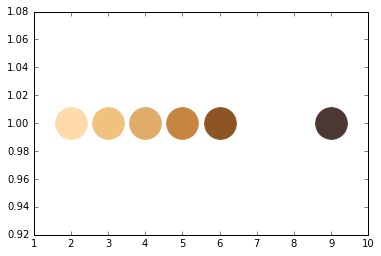

In [57]:
colors_dict = {9:(75,56,50), 6:(141,85,36), 5:(198,134,66), 4:(224,172,105), 3:(241,194,125), 2:(255,219,172)}

for value, color in colors_dict.items():
    plt.scatter(value, 1, color=rgb_to_hex(color[0], color[1], color[2]), s=1000)